# ONLINE SALES DATA - EDA PROJECT

This dataset contains online sales transaction records, comprising variables that capture various aspects of the sales process. 
The variables include:

- Transaction details: InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice
- Customer information: CustomerID, Country
- Sales performance: Sales channel, Category, Discount, PaymentMethod
- Logistics: ShippingCost, ShipmentProvider, WarehouseLocation
- Order management: Orderpriority
- Return information: Returnstatus

This exploratory data analysis (EDA) aims to examine the underlying trends, patterns, and relationships within the data to gain insights into online sales performance, customer behavior, and operational efficiency.

### Data cleaning

#### Importing Data set and libraries

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import numpy as np
data=pd.read_csv(r"C:\Users\Madhuma k\Downloads\archive (5)\online_sales_dataset.csv")

#### Basic Information about Data

In [2]:
#Basic information
data.info()
#Describe data
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49782 entries, 0 to 49781
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   InvoiceNo          49782 non-null  int64  
 1   StockCode          49782 non-null  object 
 2   Description        49782 non-null  object 
 3   Quantity           49782 non-null  int64  
 4   InvoiceDate        49782 non-null  object 
 5   UnitPrice          49782 non-null  float64
 6   CustomerID         44804 non-null  float64
 7   Country            49782 non-null  object 
 8   Discount           49782 non-null  float64
 9   PaymentMethod      49782 non-null  object 
 10  ShippingCost       47293 non-null  float64
 11  Category           49782 non-null  object 
 12  SalesChannel       49782 non-null  object 
 13  ReturnStatus       49782 non-null  object 
 14  ShipmentProvider   49782 non-null  object 
 15  WarehouseLocation  46297 non-null  object 
 16  OrderPriority      497

,InvoiceNo,Quantity,UnitPrice,CustomerID,Discount,ShippingCost
count,49782.000000,49782.000000,49782.000000,44804.000000,49782.000000,47293.000000
mean,550681.239946,22.372343,47.537862,55032.871775,0.275748,17.494529
std,260703.009944,17.917774,33.479510,25913.660157,0.230077,7.220557
min,100005.000000,-50.000000,-99.980000,10001.000000,0.000000,5.000000
25%,324543.000000,11.000000,23.592500,32750.750000,0.130000,11.220000
50%,552244.000000,23.000000,48.920000,55165.000000,0.260000,17.500000
75%,776364.000000,37.000000,74.610000,77306.250000,0.380000,23.720000
max,999997.000000,49.000000,100.000000,99998.000000,1.999764,30.000000


#### Finding and Removing duplicates

In [3]:
#remove duplicates
total_duplicates=data.duplicated().sum()
print(total_duplicates)
data.drop_duplicates(inplace=True)

0


#### Finding and Removing Null Values

In [4]:
#Remove null values
data.dropna(inplace=True)
data.isna().sum()

InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
Discount             0
PaymentMethod        0
ShippingCost         0
Category             0
SalesChannel         0
ReturnStatus         0
ShipmentProvider     0
WarehouseLocation    0
OrderPriority        0
dtype: int64

#### Changing Datatype

In [5]:
#converting int to float
data['Quantity']=data['Quantity'].astype("float64")
#converting object to datetime
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

#### A Quick Boxplot

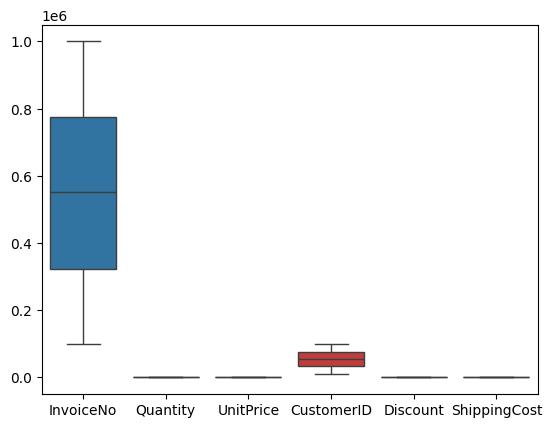

In [6]:
#boxplot to find outliers
sns.boxplot(data=data)
plt.show()
#no outliers

## DATA ANALYSIS

#### 1.Creating Final Price Column and Finding sales count in each category

In [7]:
#final_price column creation
data["Finalprice"]=((data['UnitPrice']-data['Discount'])*data['Quantity'])+data['ShippingCost']
#sale count in each category
grouped_df=data.groupby(['Category']).size().reset_index(name='count')
grouped_sort=grouped_df.sort_values(by='count',ascending=False)
print(grouped_sort)

      Category  count
3    Furniture   9074
4   Stationery   8957
2  Electronics   8956
0  Accessories   8926
1      Apparel   8891


#### 2. Sales Channel having the most Return

SalesChannel
In-store    9.845629
Online      9.738011
Name: count, dtype: float64


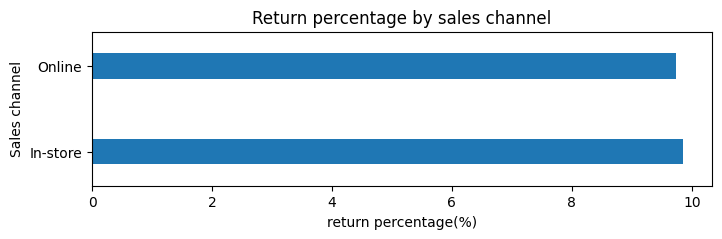

In [8]:

#2.which mode of saleschannel has the most return.
total_sales=data['SalesChannel'].value_counts()
total_returns=data[data['ReturnStatus']=='Returned']['SalesChannel'].value_counts()
returns_percentage=(total_returns/total_sales)*100
print(returns_percentage)

#plotting graph
plt.figure(figsize=(8,2))
returns_percentage.plot(kind='barh',width=0.3)
plt.title('Return percentage by sales channel')
plt.ylabel('Sales channel')
plt.xlabel('return percentage(%)')
plt.show()



#### 3. Mode of payment mostly used

PaymentMethod
Bank Transfer    15086
Credit Card      14907
paypall          14811
Name: count, dtype: int64


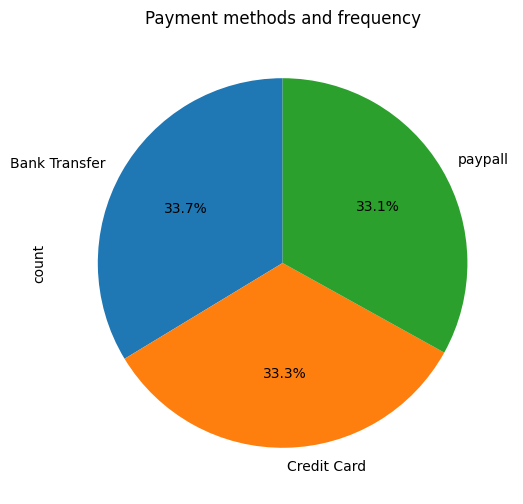

In [9]:
#3.which mode of payment is mostly used.
payment_method=data['PaymentMethod'].value_counts()
print(payment_method)

#plotting graph
plt.figure(figsize=(6,6))
payment_method.plot(kind='pie',autopct='%1.1f%%',startangle=90)
plt.title('Payment methods and frequency')
plt.show()


#### 4. Payment method and shipment provider used maximum in each year

    Year  PaymentMethod ShipmentProvider  count
1   2020  Bank Transfer            FedEx    702
18  2021    Credit Card       Royal Mail    721
27  2022  Bank Transfer              UPS    706
44  2023        paypall              DHL    691
59  2024        paypall              UPS    705
62  2025  Bank Transfer       Royal Mail    487


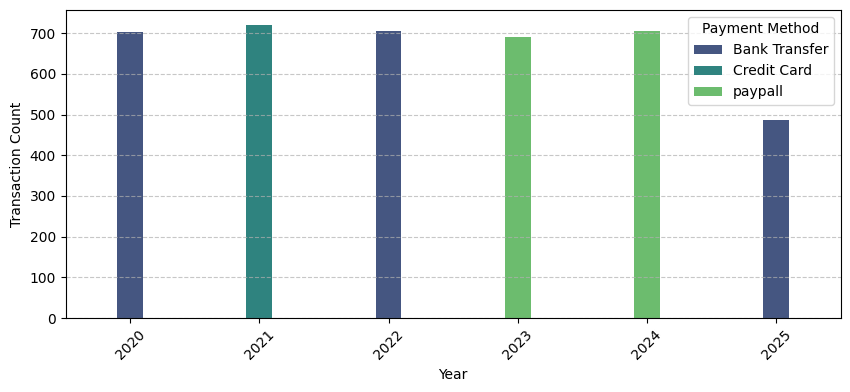

In [10]:
#4.payment method and shipmentProvider used maximum in each year.
data['Year']=data['InvoiceDate'].dt.year
grouped_df2=data.groupby(['Year','PaymentMethod','ShipmentProvider']).size().reset_index(name='count')
max_pay_method=grouped_df2.loc[grouped_df2.groupby('Year')['count'].idxmax()]
print(max_pay_method)

# Barplot of the most used payment method per year
plt.figure(figsize=(10,4))
sns.barplot(data=max_pay_method, x='Year', y='count', hue='PaymentMethod', palette='viridis',width=0.2)
plt.xlabel("Year")
plt.ylabel("Transaction Count")
plt.xticks(rotation=45)
plt.legend(title="Payment Method")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### 5. Category with maximum profit margin

Category    Accessories
Profit      1246.712026
Name: 0, dtype: object
      Category       Profit
0  Accessories  1246.712026
3    Furniture  1244.064128
1      Apparel  1241.593912
2  Electronics  1239.434071
4   Stationery  1234.990536


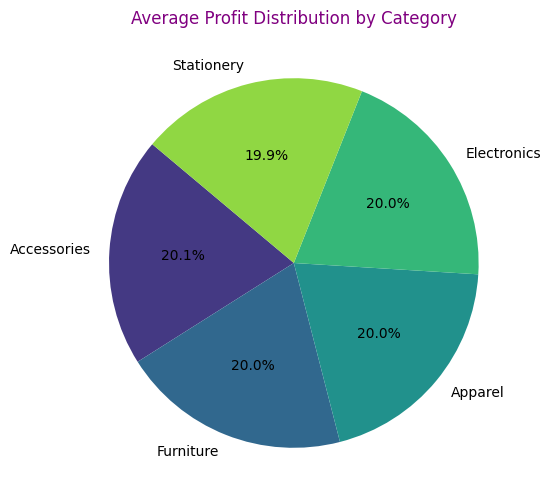

In [11]:
#5.find the category with maximum profit margin(mean).
data['TotalRevenue']=data['Quantity']*data['UnitPrice']
data['Profit']=data['TotalRevenue']-data['ShippingCost']
mean_profit=data.groupby('Category')['Profit'].mean().reset_index()
mean_profit=mean_profit.sort_values(by='Profit',ascending=False)
print(mean_profit.iloc[0])
print(mean_profit)

#plotting piechart
colors = sns.color_palette("viridis", len(mean_profit))
plt.figure(figsize=(6,6))
plt.pie(mean_profit['Profit'], labels=mean_profit['Category'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Average Profit Distribution by Category",color='purple')
plt.show()


#### 6. Yearly Sales Trend

   Year  UnitPrice
0  2020  398386.52
1  2021  396146.00
2  2022  398919.51
3  2023  401095.08
4  2024  401184.01


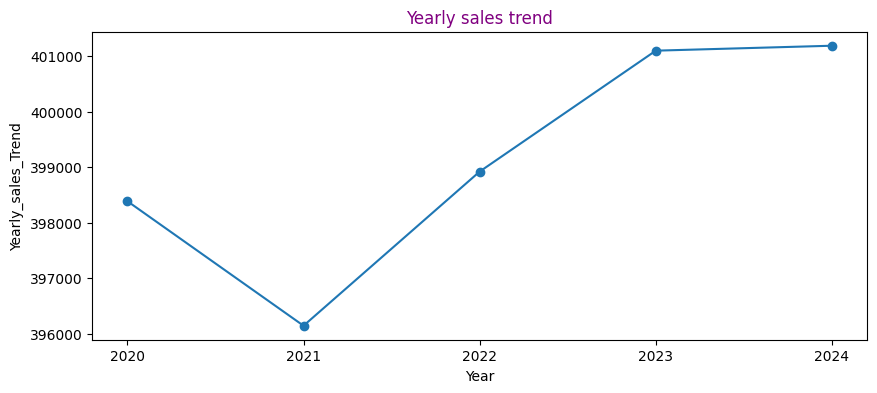

In [12]:
#6.yearly sales trend
data['Year']=data['InvoiceDate'].dt.year
data=data[data['Year']<2025]
yearly_sales=data.groupby('Year')['UnitPrice'].sum().reset_index()
print(yearly_sales)

#ploating Yearly sales data
plt.figure(figsize=(10,4))
plt.plot(yearly_sales['Year'],yearly_sales['UnitPrice'],marker='o')
plt.title('Yearly sales trend',color='purple')
plt.xlabel('Year')
plt.ylabel('Yearly_sales_Trend')
plt.xticks(yearly_sales['Year'].unique())
plt.show()

#### 7. Country with highest sales Revenue

In [13]:
#7.country with highest sales Revenue
data['TotalRevenue']=data['Quantity']*data['UnitPrice']
data['Profit']=data['TotalRevenue']-data['ShippingCost']
country_profit=data.groupby('Country')['Profit'].sum().reset_index()
max_profit_country=country_profit.loc[country_profit['Profit'].idxmax()]
print(max_profit_country['Country'])
print(max_profit_country['Profit'])

Germany
4203284.24


#### 8. Order priority and Shipping cost Relation

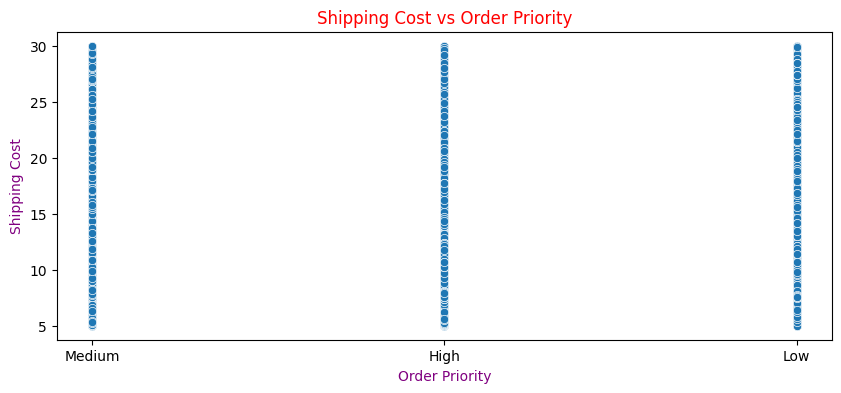

In [14]:
#8.order priority and shipping cost Relation
plt.figure(figsize=(10,4))
sns.scatterplot(data=data, x='OrderPriority', y='ShippingCost')

#Scatter plot
plt.title('Shipping Cost vs Order Priority',color='Red')
plt.xlabel('Order Priority',color='purple')
plt.ylabel('Shipping Cost',color='purple')
plt.show()

#### 9. Description with highest Quantity sold rate

Description
Wall Clock        91871.0
USB Cable         91297.0
Backpack          90739.0
White Mug         90280.0
Desk Lamp         89717.0
Office Chair      89219.0
Wireless Mouse    88273.0
T-shirt           88099.0
Blue Pen          87892.0
Notebook          87709.0
Headphones        87415.0
Name: Quantity, dtype: float64
Maximum_quantity_sold: Wall Clock


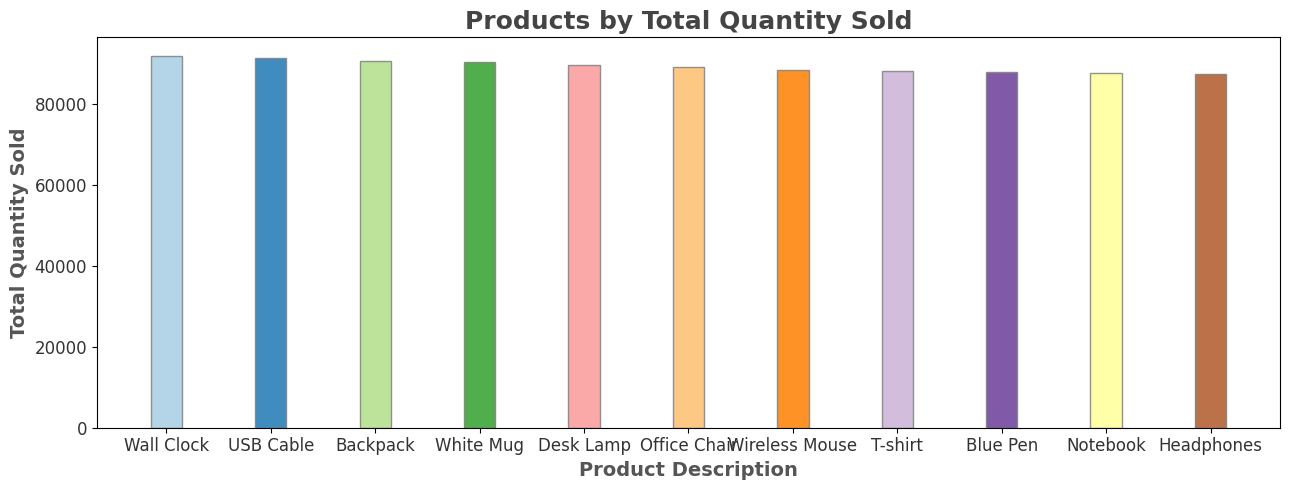

In [15]:
#9.Which description has the highest quantity sold
import numpy as np
max_quantity_description=data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
print(max_quantity_description)
print("Maximum_quantity_sold:",max_quantity_description.idxmax())

#Bar plot
colors = plt.cm.Paired(np.linspace(0, 1, len(max_quantity_description)))
plt.figure(figsize=(13, 5))
bars = plt.bar(max_quantity_description.index, max_quantity_description.values,width=0.3,
                color=colors, edgecolor='black', alpha=0.85)  
for bar in bars:
    bar.set_edgecolor('gray')
plt.title("Products by Total Quantity Sold", fontsize=18, fontweight='bold', color='#444444')
plt.ylabel('Total Quantity Sold', fontsize=14, fontweight='bold', color='#555555')
plt.xlabel('Product Description', fontsize=14, fontweight='bold', color='#555555')
plt.xticks(fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')
plt.tight_layout()
plt.show()


#### 10. Correlation between Shipping cost and Quantity

              ShippingCost  Quantity
ShippingCost       1.00000  -0.00393
Quantity          -0.00393   1.00000


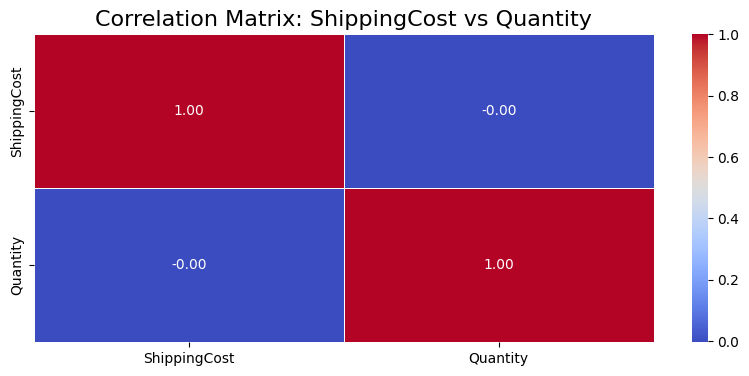

In [16]:
#10.correlation between shipping cost and quantity
correlation_matrix=data[['ShippingCost','Quantity']].corr()
print(correlation_matrix)
#week negative relation-as quantity increases Shipping cost slightly decreases.

plt.figure(figsize=(10,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: ShippingCost vs Quantity", fontsize=16)
plt.show()



#### 11. Unit Price and Category Relation

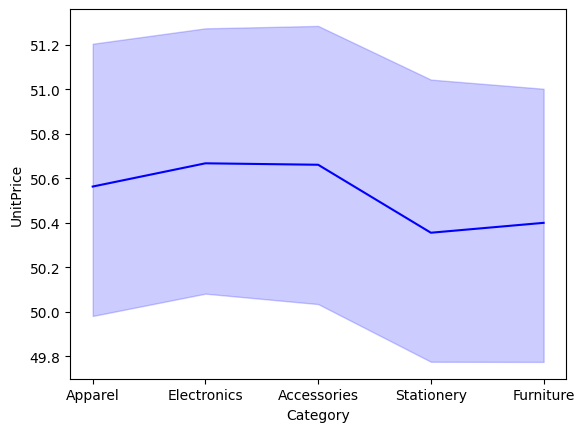

In [17]:
#11 Are unit prices consistent with category?
sns.lineplot(x='Category',y='UnitPrice',data=data,color='blue')
plt.show()

#### 12. Most Frequently Returned Product

Notebook


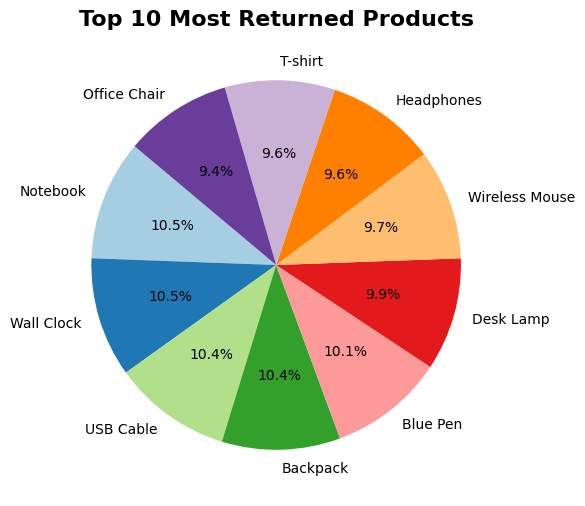

In [18]:
#12.which product have returned the most?
returned_most=data[data['ReturnStatus']=='Returned']
most_returned_product=returned_most['Description'].value_counts()
print(most_returned_product.idxmax())

#pie plot
top_n = 10
most_returned_product_top = most_returned_product.head(top_n)
plt.figure(figsize=(8,6))
plt.pie(most_returned_product_top.values, labels=most_returned_product_top.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title(f"Top {top_n} Most Returned Products", fontsize=16, fontweight='bold')
plt.show()

#### 13. Distrubution of Product Category

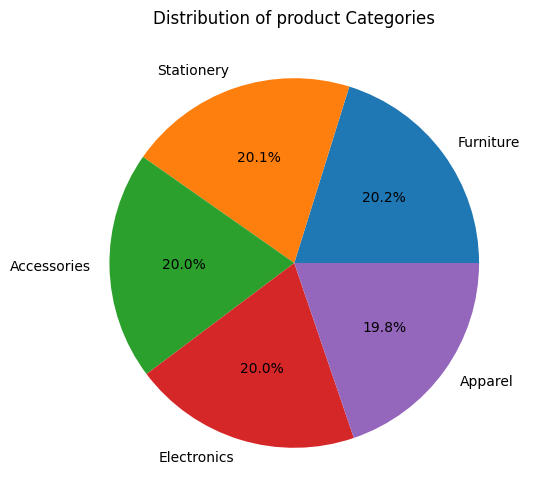

In [19]:
#13.Distrubution of product category using pie plot.
category_counts=data['Category'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(category_counts.values,labels=category_counts.index,autopct='%1.1f%%')
plt.title('Distribution of product Categories')
plt.show()

#### 14. Order Priority and Category Relation

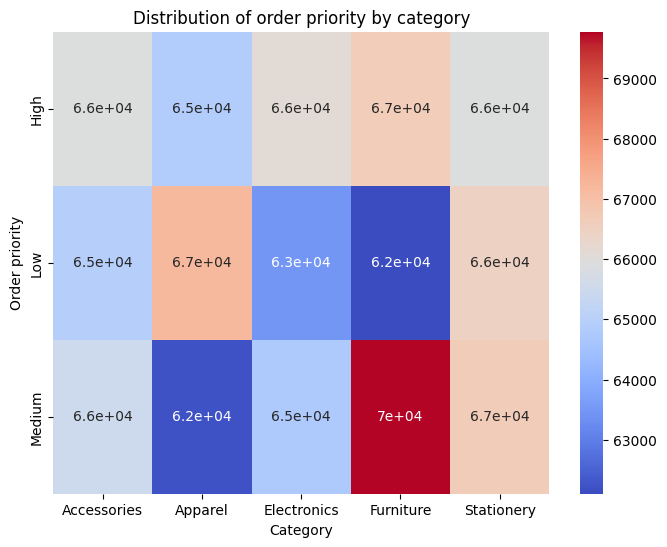

In [20]:
#14 Distrubution of order priority by category using heatmap
pivot_data=data.pivot_table(index='OrderPriority',columns='Category',values='Quantity',aggfunc='sum')
plt.figure(figsize=(8,6))
sns.heatmap(pivot_data,annot=True,cmap='coolwarm')
plt.title('Distribution of order priority by category')
plt.xlabel('Category')
plt.ylabel('Order priority')
plt.show()
# Most order fall in to medium priority,especially for furniture. 
# furniture category has the highest number of order for medium priority.
# Distribution of low priority and  high priority orders is relatively uniform.

#### 15. Top Performing Sales Channel

Sales channel generating more revenue: 
Online 24919094.52


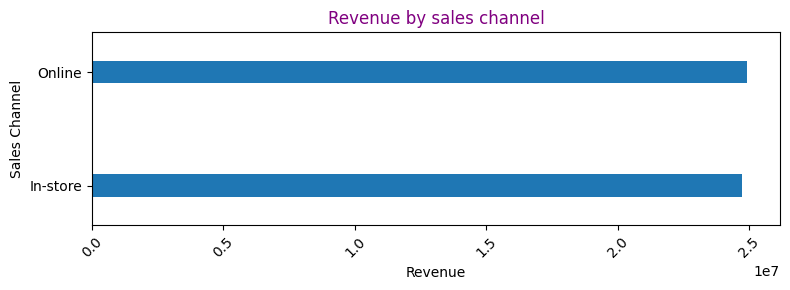

In [21]:
#15.Which sales channel generated the most revenue?
data['TotalRevenue']=data['UnitPrice']*data['Quantity']
revenue_bychannel=data.groupby('SalesChannel')['TotalRevenue'].sum()
print("Sales channel generating more revenue: ")
print(revenue_bychannel.idxmax(),revenue_bychannel.max())

#plotting graph
plt.figure(figsize=(8,3))
revenue_bychannel.plot.barh(width=0.2)
plt.title('Revenue by sales channel',color='purple')
plt.ylabel('Sales Channel')
plt.xlabel('Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### 16. Product Category stored in each Warehouse

   WarehouseLocation     Category  StockCode
3          Amsterdam    Furniture       1647
4          Amsterdam   Stationery       1637
0          Amsterdam  Accessories       1621
2          Amsterdam  Electronics       1618
1          Amsterdam      Apparel       1597
5             Berlin  Accessories       1602
7             Berlin  Electronics       1589
8             Berlin    Furniture       1567
9             Berlin   Stationery       1554
6             Berlin      Apparel       1544
12            London  Electronics       1604
10            London  Accessories       1596
13            London    Furniture       1585
11            London      Apparel       1577
14            London   Stationery       1532
19             Paris   Stationery       1562
18             Paris    Furniture       1561
17             Paris  Electronics       1559
15             Paris  Accessories       1537
16             Paris      Apparel       1527
24              Rome   Stationery       1645
23        

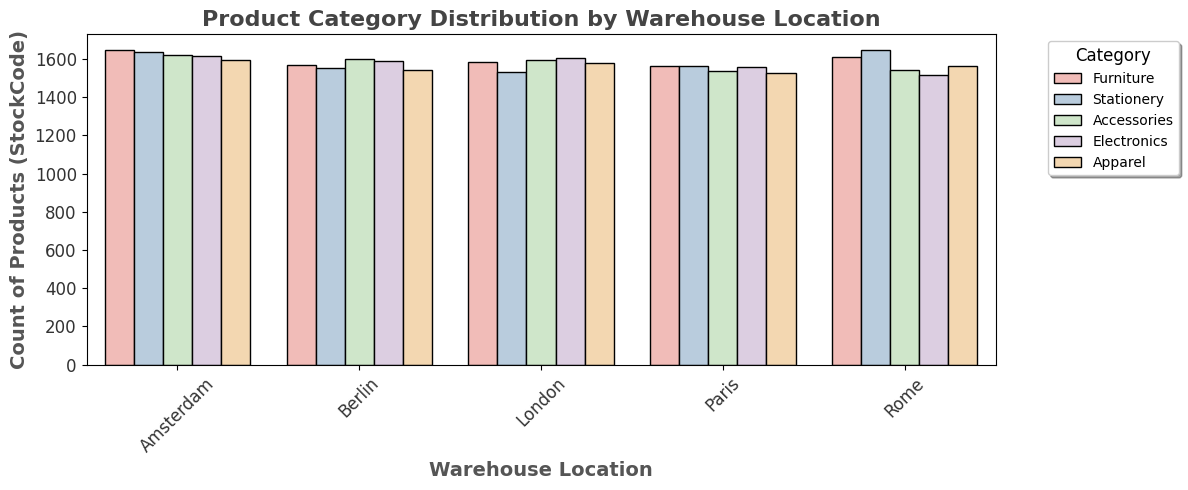

In [22]:
#16.which product category are stored in each ware house?
product_category_bywarehouse=data.groupby(['WarehouseLocation','Category'])['StockCode'].count().reset_index()
product_category_bywarehouse=product_category_bywarehouse.sort_values(by=['WarehouseLocation','StockCode'],ascending=[True,False])
print(product_category_bywarehouse)

#Bar plot
plt.figure(figsize=(12, 5))
sns.barplot(data=product_category_bywarehouse, x='WarehouseLocation', y='StockCode', 
            hue='Category', palette='Pastel1',width=0.8, edgecolor='black')
plt.title('Product Category Distribution by Warehouse Location', fontsize=16, fontweight='bold', color='#444444')
plt.xlabel('Warehouse Location', fontsize=14, fontweight='bold', color='#555555')
plt.ylabel('Count of Products (StockCode)', fontsize=14, fontweight='bold', color='#555555')
plt.xticks(rotation=45, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left', 
           frameon=True, fancybox=True, shadow=True, title_fontsize=12)
plt.tight_layout()
plt.show()

#### 17. Monthly Sales Trend

    Month  UnitPrice
0       1  167978.80
1       2  155391.33
2       3  170328.12
3       4  162088.22
4       5  170271.86
5       6  163887.32
6       7  166752.41
7       8  169720.06
8       9  162777.58
9      10  171550.53
10     11  163744.83
11     12  171240.06


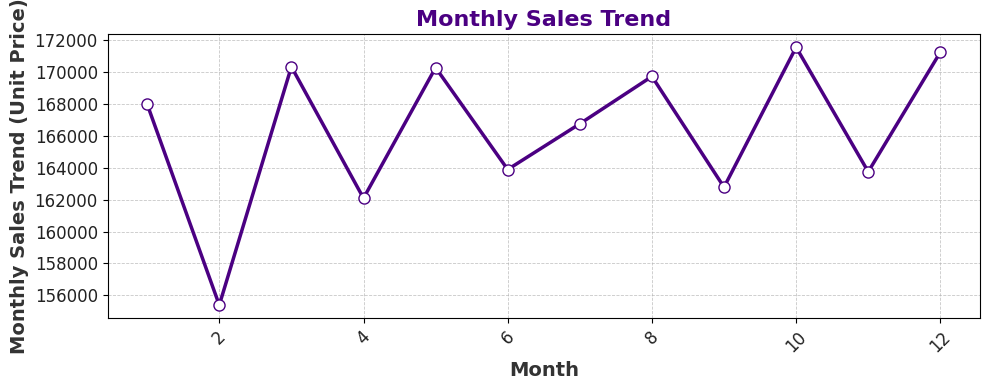

In [23]:
#17.monthly sales trend.
data['Year']=data['InvoiceDate'].dt.year
data=data[data['Year']<2025]
data['Month']=data['InvoiceDate'].dt.month
monthly_sales=data.groupby('Month')['UnitPrice'].sum().reset_index()
print(monthly_sales)

#Line plot for Yearly sales data
plt.figure(figsize=(10, 4))
plt.plot(monthly_sales['Month'], monthly_sales['UnitPrice'], 
         marker='o', linestyle='-', linewidth=2.5, markersize=8, 
         color='#4B0082', markerfacecolor='white', markeredgecolor='#4B0082')
plt.title('Monthly Sales Trend', fontsize=16, fontweight='bold', color='#4B0082')
plt.xlabel('Month', fontsize=14, fontweight='bold', color='#333333')
plt.ylabel('Monthly Sales Trend (Unit Price)', fontsize=14, fontweight='bold', color='#333333')
plt.grid(True, linestyle='--', linewidth=0.6, alpha=0.7)
plt.xticks(fontsize=12, color='#222222', rotation=45)
plt.yticks(fontsize=12, color='#222222')
plt.tight_layout()
plt.show()


#### 18. Maximum Discount Applied Category

In [24]:
#18.Category with maximum discount
max_discount_by_category=data.groupby('Category')['Discount'].max()
max_discount_by_category=max_discount_by_category.idxmax()
print("category with maximum discount:",max_discount_by_category)


category with maximum discount: Accessories


#### 19. Highest Profit generated Category

In [25]:
#19.Maximum profit description amoung different category
data['Revenue']=data['UnitPrice']*data['Quantity']
data['Profit']=data['Revenue']-data['ShippingCost']
grouped_df3=data.groupby(['Category','Description'])['Profit'].sum().reset_index()
max_profit_group=grouped_df3.loc[grouped_df3['Profit'].idxmax()]
print(max_profit_group)

Category       Furniture
Description     Backpack
Profit         990228.59
Name: 33, dtype: object


#### 20. Highest Sold item in each Category

In [26]:
#20.Highest sold item in each category
pivot_data=data.pivot_table(index='Category',columns='Description',values='Quantity',aggfunc='sum')
top_selling_item=pivot_data.idxmax(axis=1)
print(top_selling_item)


Category
Accessories    Wall Clock
Apparel         USB Cable
Electronics     USB Cable
Furniture        Backpack
Stationery     Wall Clock
dtype: object


#### 21. Category and Payment Method Used Count

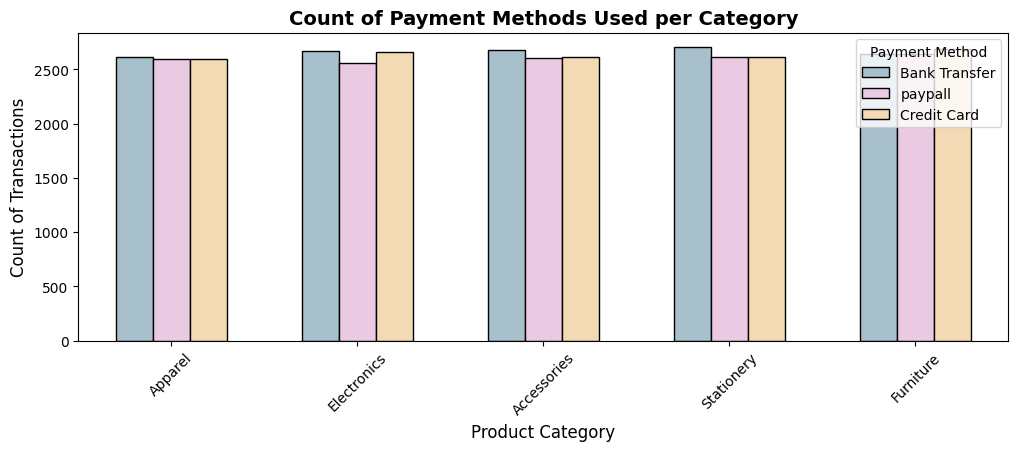

In [27]:
#21 find out the count of payment method used per category
plt.figure(figsize=(12, 4))
custom_palette = ['#A1C3D1', '#EFC3E6', '#FFDBAA']  # Soft pastel shades
sns.countplot(x='Category', hue='PaymentMethod', data=data, 
              palette=custom_palette, edgecolor='black',width=0.6)
plt.title('Count of Payment Methods Used per Category', fontsize=14, fontweight='bold')
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Count of Transactions', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.show()


# SUMMARY

The exploratory data analysis reveal that accessories have the highest profit margin among all categories. Additionally, in-store returns are more frequent than online returns. Payment preferences vary by year, with Bank Transfer leading in 2020, 2022, and 2025. Shipment provider preferences also shift, with FedEx, Royal Mail, UPS, and DHL each dominating in different years. Overall, customer behavior is evolving, with changes in payment and shipment preferences influenced by factors like cost, delivery speed, and regional differences.Most order fall in to medium priority,especially for furniture and it has highest number of Orders. Distribution of low priority and  high priority orders is relatively uniform. Germany is the country with the highest sales Revenue,indicating Strong Market performance.Online is the top performing sales channel, Indicating higher customer preference for digital purchases over physical stores.

#### Suggestions:
1. Invest in online marketing for Strengthening digital marketing strategies, including social media ads,search engine optimization(SEO) to boost online sales.
2. Promote Low-Selling products by investigating ways to promote them more effectievely, such as bundling with higher-selling items or offering discounts.
3. Optimize Logistics and Delivery by improving delivery times and return policies to enhance customer satisfaction and build trust in online shopping experience.
4. Since office chairs have the least returns, analyze what makes them successfull and apply similar strategies to other products.
5. Enhance Quality Control by conducting more thorough quality checks on high-return products to minimize defects and improve overall customer satisfaction.
6. Focus on Volume for Stationery by increasing sales Volume through bulk purchases,loyalty programs or bundled deals to boost overall revenue.
7. Focus on High-selling products to expand their availability or introduce variations to maintain customer interest and maximize sales.